In [1]:
%run util_draw.py
%matplotlib inline
import rootpy as rpy
from rootpy.io import root_open

In [49]:
h2s = []
fns = ['../e1f6/test/e1f_skim_small.root', '../e1f6/test/e16_skim_small.root']
dns = ['mon_raw', 'mon_eid_efid_nphe_hfid']
hns = ['hmmppip_V_mmp_%d', 'hmmppippim_V_mmp_%d']
hrs = [((0.4,1.2),(0,1.1)), ((0.4,1.2),(0,0.8))]
with root_open('../e1f6/test/e1f_skim_small.root') as fin:
    for dn in dns:
        for hnt,hr in zip(hns,hrs):
            h = None
            for sect in range(1,7):
                hn = hnt%sect
                htmp = fin['%s/%s'%(dn,hn)]
                if h is None:
                    h = asrootpy(htmp)
                    h.SetName(hnt.replace('_%d',''))
                else:
                    h.Add(htmp)
            h.GetXaxis().SetRangeUser(hr[0][0],hr[0][1])
            h.GetYaxis().SetRangeUser(hr[1][0],hr[1][1])
            h.SetDirectory(0)
            h2s.append(h)

In [50]:
h2s = [h2s[0],h2s[2],h2s[1],h2s[3]]

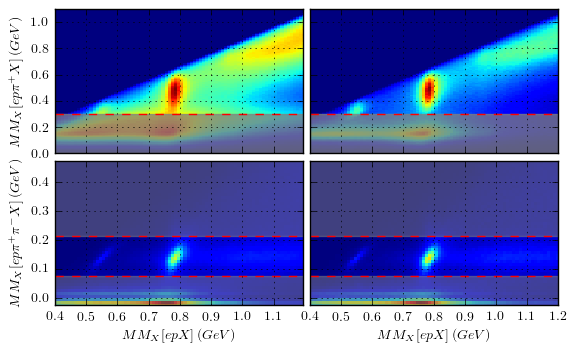

In [94]:
hrs = [((0.4,1.195),(0,1.1)), ((0.4,1.2),(0,1.1)),
       ((0.4,1.195),(-0.025,0.475)), ((0.4,1.2),(-0.025,0.475))]
xaxls = ['', '', r'$MM_X [epX]\,(GeV)$', r'$MM_X [epX]\,(GeV)$']
yaxls = [r'$MM_X [ep\pi^+X]\,(GeV)$', '', r'$MM_X [ep\pi^+\pi^-X]\,(GeV)$', '']
fig, axes = plt.subplots(2,2, sharex='col', sharey='row',
                         gridspec_kw={'wspace':0.025, 'hspace':0.05},
                         figsize=goldenaspect(6.5,2,2))
for iax, (ax, h2) in enumerate(zip(fig.get_axes(), h2s)):
# for iax, (ax, h2) in enumerate(zip(fig.get_axes(), h2s[0:2])):
    rplt.imshow(h2, axes=ax)
#     draw(h2, 2,2,iax+1, fig=fig)
#     plt.xlim(*hrs[0][0])
#     plt.ylim(*hrs[0][1])
    ax.set_xlim(*(hrs[iax][0]))
    ax.set_ylim(*(hrs[iax][1]))
    ax.grid()
    ax.set_xlabel(xaxls[iax])
    ax.set_ylabel(yaxls[iax])
    if iax<2:
        ax.hlines(0.3, 0.4,1.2, 'red', 'dashed') # 0.68,0.91)
        ax.fill_between([0.4,1.2], 0, 0.3, color='gray', alpha=0.75)
    else:
        ax.hlines(0.075, 0.4,1.2, 'red', 'dashed') # 0.68,0.91)
        ax.hlines(0.215, 0.4,1.2, 'red', 'dashed')
        ax.fill_between([0.4,1.2], -0.025, 0.075, color='gray', alpha=0.5)
        ax.fill_between([0.4,1.2], 0.215, 0.475, color='gray', alpha=0.5)
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])

fig.savefig('evt_sel_top_1_3_e1f.pdf', bbox_inches='tight')

In [2]:
dn = '../e1f6/test'
fn_tmpl = '%s_skim_small.root'
def get_sectVpmt(exp='e1f', tpath='h10_eid_efid_nphe_hfid_mmp/h10', fn=None):
    if fn is None:
        fn = fn_tmpl%exp
    with root_open('%s/%s'%(dn,fn), 'r') as fin:
        h10 = asrootpy(fin[tpath])
        h10.SetAlias("segm","int((cc_segm[cc[0]-1]%1000)/10)")
        h10.SetAlias("sect","cc_sect[cc[0]-1]")
        h10.SetAlias("pmt","(2*segm-1)+(cc_segm[cc[0]-1]/1000-1>0)*1")
        hcc2d = h10.Draw("pmt:sect>>h2(36,0.5,36.5,6,0.5,6.5)", "", "goff")
        hcc2d.SetDirectory(0)
        hcc2d.SetName('hcc2d_%s'%exp)
        return asrootpy(hcc2d)
    
def get_pmtPerSect(h_sectVpmt):
    hs = []
    h2 = h_sectVpmt.Clone('h2')
    h2.reset()
    for pmt in range(1,39):
        h = asrootpy(h_sectVpmt.ProjectionY('hpmt', pmt, pmt))
        nval = np.mean(np.sort(list(h.y()))[-2:])
        for sect in range(1,7):
            val = h_sectVpmt.GetBinContent(pmt,sect)
            err = h_sectVpmt.GetBinError(pmt,sect)
            h2.SetBinContent(pmt,sect, val/nval)
            h2.SetBinError(pmt,sect, err/nval)
    for sect in range(1,7):
        hname = '%s_S%d'%(h_sectVpmt.GetName(),sect)
        h = h2.ProjectionX(hname, sect, sect)
        h.SetDirectory(0)
        hs.append(asrootpy(h))
    return hs

In [3]:
h2_e1f = get_sectVpmt()
h2_e16 = get_sectVpmt('e16')

h2_e1f_sim = get_sectVpmt(exp='e1f_sim', tpath='h10_eid_efid_nphe_mmp/h10',
                          fn='e1f_sample60_skim_small.root')
h2_e16_sim = get_sectVpmt(exp='e16_sim', tpath='h10_eid_efid_nphe_mmp/h10',
                          fn='e16_sample60_skim_small.root')

In [6]:
hs_e1f_sim = get_pmtPerSect(h2_e1f_sim)
hs_e16_sim = get_pmtPerSect(h2_e16_sim)

hs_e1f = get_pmtPerSect(h2_e1f)
hs_e16 = get_pmtPerSect(h2_e16)

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [8]:
for (h,hsim) in zip(hs_e1f, hs_e1f_sim):
    h.Divide(hsim)
for (h,hsim) in zip(hs_e16, hs_e16_sim):
    h.Divide(hsim)

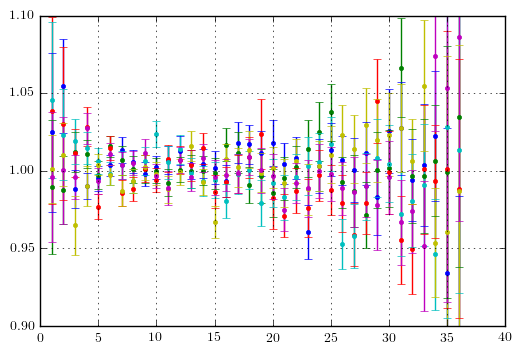

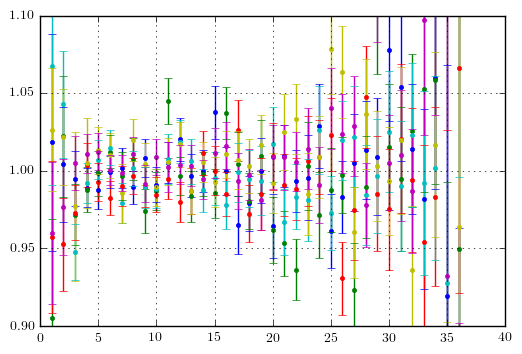

In [10]:
fig = plt.figure()
colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
for icolor,h in enumerate(hs_e1f):
    X, Y, E = list(h.x()), list(h.y()), list(zip(*h.yerr()))[0]
    plt.errorbar(X,Y,E, fmt='%s.'%colors[icolor], label=h.get_title())
plt.grid()
plt.ylim(0.9,1.1)
plt.show()

fig = plt.figure()
colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
for icolor,h in enumerate(hs_e16):
    X, Y, E = list(h.x()), list(h.y()), list(zip(*h.yerr()))[0]
    plt.errorbar(X,Y,E, fmt='%s.'%colors[icolor], label=h.get_title())
plt.grid()
plt.ylim(0.9,1.1)
plt.show()

In [18]:
stds = [[], []]
avg_errs = [[], []]
for pmt in range(1,37):
    stds[0].append(np.std([h.GetBinContent(pmt) for h in hs_e16]))
    stds[1].append(np.std([h.GetBinContent(pmt) for h in hs_e1f]))
    avg_errs[0].append(np.mean([h.GetBinError(pmt) for h in hs_e16]))
    avg_errs[1].append(np.mean([h.GetBinError(pmt) for h in hs_e1f]))

In [21]:
X = range(1,37)
std_e16, std_e1f = stds
err_e16, err_e1f = avg_errs

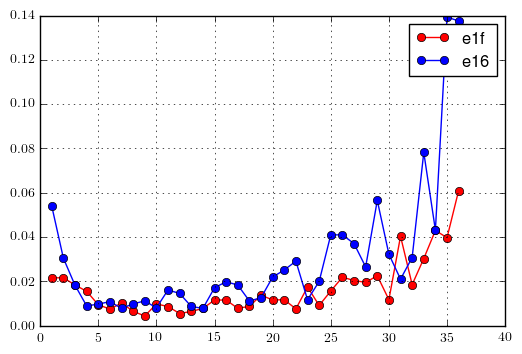

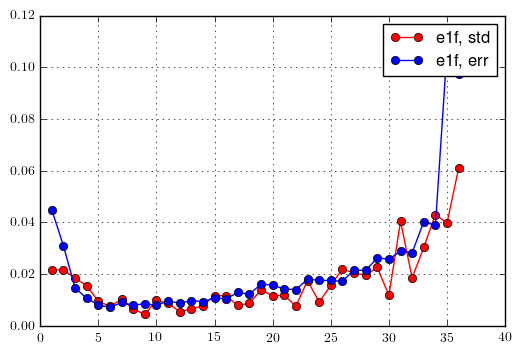

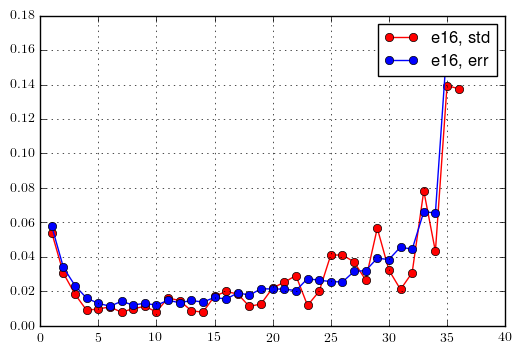

In [24]:
fig = plt.figure()
plt.plot(X,std_e1f, 'ro-', label='e1f')
plt.plot(X,std_e16, 'bo-', label='e16')
plt.grid()
plt.legend()
plt.show()
fig = plt.figure()
plt.plot(X,std_e1f, 'ro-', label='e1f, std')
plt.plot(X,err_e1f, 'bo-', label='e1f, err')
plt.grid()
plt.legend()
plt.show()
fig = plt.figure()
plt.plot(X,std_e16, 'ro-', label='e16, std')
plt.plot(X,err_e16, 'bo-', label='e16, err')
plt.legend()
plt.grid()
plt.show()